<a href="https://colab.research.google.com/github/dhanavel2021/KNN/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,auc
from sklearn.metrics import roc_curve

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/0.MKCE/Datasets/Social_Network_Ads.csv')

In [ ]:
data1=pd.get_dummies(data)
data1
data1.drop(['User ID'],axis=1)

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19.0,19000.0,0,0,1
1,35.0,20000.0,0,0,1
2,26.0,43000.0,0,1,0
3,27.0,57000.0,0,1,0
4,19.0,76000.0,0,0,1
...,...,...,...,...,...
395,46.0,41000.0,1,1,0
396,51.0,23000.0,1,0,1
397,50.0,20000.0,1,1,0
398,36.0,33000.0,0,0,1


In [ ]:
x=data1.drop(['Purchased'],axis=1).values
y=data1['Purchased'].values

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
s=StandardScaler()

In [ ]:
c=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
c.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
p=c.predict(x_test)

In [ ]:
c.predict_proba(x_test)

array([[0.6, 0.4],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.2, 0.8],
       [1. , 0. ],
       [0.2, 0.8],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [0.8, 0.2],
       [1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ],
       [1. , 0. ],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.6, 0.4],
       [0. , 1. ],
       [1. , 0. ],
       [0.2, 0.8],
       [0. , 1. ],
       [0. , 1. ],
       [0.6, 0.4],
       [0.8, 0.2],
       [1. , 0. ],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.8, 0.2],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.6, 0.4],
       [1. , 0. ],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.4, 0.6],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.2, 0.8],
       [0.6,

In [ ]:
accuracy_score(y_test,p)

0.7333333333333333

In [ ]:
z=classification_report(y_test,p)
print(z)

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        79
           1       0.64      0.51      0.57        41

    accuracy                           0.73       120
   macro avg       0.70      0.68      0.69       120
weighted avg       0.72      0.73      0.73       120



In [ ]:
z=classification_report(y_test,p)
print(z)

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        79
           1       0.64      0.51      0.57        41

    accuracy                           0.73       120
   macro avg       0.70      0.68      0.69       120
weighted avg       0.72      0.73      0.73       120



In [ ]:

y_proba=c.predict_proba(x_test)
y_predicted=y_proba[:,1]

In [ ]:
fpr,tpr,thresholds=roc_curve(y_test,y_predicted)

In [ ]:
roc_auc=auc(fpr,tpr)
print(roc_auc)

0.7344859524544612


Text(0, 0.5, 'True Positive Rate(sensitivity')

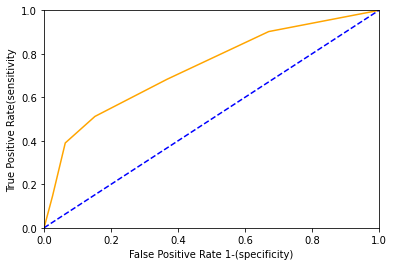

In [ ]:
plt.figure()
plt.plot(fpr,tpr,color='orange',label='ROC'%roc_auc)
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate 1-(specificity)')
plt.ylabel('True Positive Rate(sensitivity')